In [1]:
import pandas as pd

red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1.
white_wine['color'] = 0.

wine = pd.concat([red_wine, white_wine])
wine['taste'] = [1. if grade>5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [2]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.2, random_state=13)

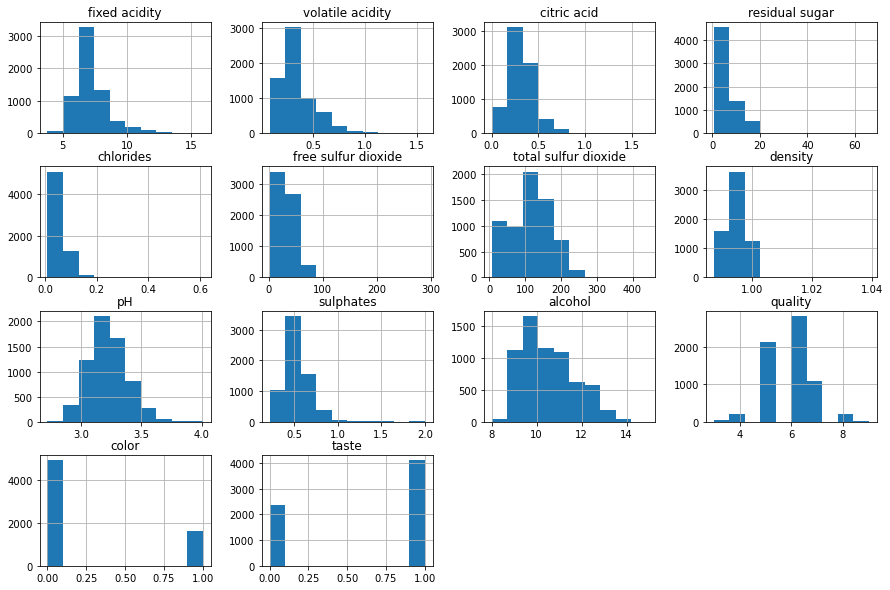

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

wine.hist(bins=10, figsize=(15, 10))
plt.show()

##### quality별 다른 특성이 어떤지 확인한다.`

In [6]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color', 'taste'],
      dtype='object')

In [7]:
column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

df_pivot_table = wine.pivot_table(column_names, ['quality'], aggfunc='median')
df_pivot_table

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,
3,10.15,0.0550,0.33,0.995900,7.45,17.0,3.245,3.15,0.505,102.5,0.415
4,10.00,0.0505,0.26,0.994995,7.00,15.0,3.220,2.20,0.485,102.0,0.380
5,9.60,0.0530,0.30,0.996100,7.10,27.0,3.190,3.00,0.500,127.0,0.330
6,10.50,0.0460,0.31,0.994700,6.90,29.0,3.210,3.10,0.510,117.0,0.270
7,11.40,0.0390,0.32,0.992400,6.90,30.0,3.220,2.80,0.520,114.0,0.270
8,12.00,0.0370,0.32,0.991890,6.80,34.0,3.230,4.10,0.480,118.0,0.280
9,12.50,0.0310,0.36,0.990300,7.10,28.0,3.280,2.20,0.460,119.0,0.270


In [8]:
corr_matrix = wine.corr()
print(corr_matrix['quality'].sort_values(ascending=False))

quality                 1.000000
taste                   0.814484
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
color                  -0.119323
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


C:\Anaconda3\envs\ds_study\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


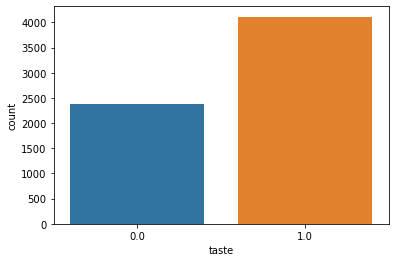

In [9]:
import seaborn as sns

sns.countplot(wine['taste'])
plt.show()

In [13]:
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

models = []
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier()))
models.append(('LogisticRegression', LogisticRegression()))

In [14]:
models

[('RandomForestClassifier', RandomForestClassifier()),
 ('DecisionTreeClassifier', DecisionTreeClassifier()),
 ('AdaBoostClassifier', AdaBoostClassifier()),
 ('GradientBoostingClassifier', GradientBoostingClassifier()),
 ('LogisticRegression', LogisticRegression())]

In [16]:
from sklearn.model_selection import KFold, cross_val_score

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, random_state=13, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    
    print(name, cv_results.mean(), cv_results.std())

RandomForestClassifier 0.8187339897830753 0.0196309677704431
DecisionTreeClassifier 0.7540849189309247 0.010377125708615393
AdaBoostClassifier 0.7533103205745169 0.02644765901536818
GradientBoostingClassifier 0.7663959428444511 0.021596556352125432
LogisticRegression 0.74273191678389 0.015548839626296565


In [18]:
%%time

UsageError: %%time is a cell magic, but the cell body is empty. Did you mean the line magic %time (single %)?


##### cross-validation 결과를 밀목요연하게 확인하기

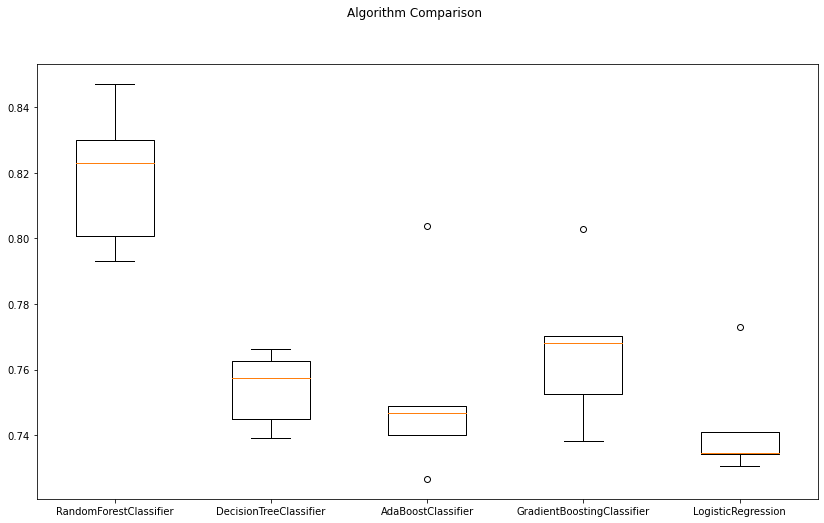

In [19]:
fig = plt.figure(figsize=(14, 8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

##### 테스트 데이터에 대한 평가 결과

In [23]:
from sklearn.metrics import accuracy_score

for name, model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(name, accuracy_score(y_test, pred))

RandomForestClassifier 0.8323076923076923
DecisionTreeClassifier 0.7738461538461539
AdaBoostClassifier 0.7553846153846154
GradientBoostingClassifier 0.7884615384615384
LogisticRegression 0.7469230769230769
